# Самостоятельная работа №4. Классификация

## Ершов А.Г. КМБО-03-23, 2 семестр

### Вариант 4

Набор данных: [Video game sales](https://www.kaggle.com/gregorut/videogamesales)

Тип классификатора: DecisionTreeClassifier (решающее дерево)

Классификация по столбцу: Platform (DS – класс 0, остальные уровни – класс 1)

## 1.

### Подготовка набора данных

Прочитаем данные продаж видеоигр, обработаем столбец `Platform`, содержащий целевой признак, по принципу "DS" - класс 0, остальные уровни – класс 1. Выделим столбец `Platform` а также выделим столбцы с признаками, по которым будет производится классификация (`Rank`, `Year`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`). Разделим набор на тестовую и обучающую выборку (`train_test_split(x, platform, test_size=0.25, random_state=8)`) и построим решающее дерево на основе данных обучающей выборки, перебрав несколько значений `max_depth`, оценивая получаемые значения функции `DecisionTreeClassifier.score(...)`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


data = pd.read_csv('./vgsales.csv')
data['Platform'] = np.where(data['Platform'] == 'DS', 0, 1)
data = data.dropna()

platform = data.loc[:, data.columns.isin(['Platform'])]
features = ['Rank', 'Year', 'NA_Sales', 'EU_Sales',
            'JP_Sales', 'Other_Sales', 'Global_Sales']
x = data.loc[:, data.columns.isin(features)]

x_tr, x_val, y_tr, y_val = train_test_split(x, platform,
                                            test_size=0.25, random_state=8)

best_tree = DecisionTreeClassifier(random_state=6679, max_depth=1)
best_tree = best_tree.fit(x_tr, y_tr)

for i in range(2,10):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree = tree.fit(x_tr, y_tr)
    if tree.score(x_val, y_val) > best_tree.score(x_val, y_val):
        best_tree = tree

Далее выведем отчет по полученному классификатору на основе тестовой выборки при помощи функции `classification_report(...)` и оценим его точность при помощи функции `accuracy_score(...)`, а также получим значимость используемых признаков. 

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       545
           1       0.87      1.00      0.93      3528

    accuracy                           0.87      4073
   macro avg       0.93      0.50      0.47      4073
weighted avg       0.88      0.87      0.81      4073

Accuracy: 0.8671740731647435


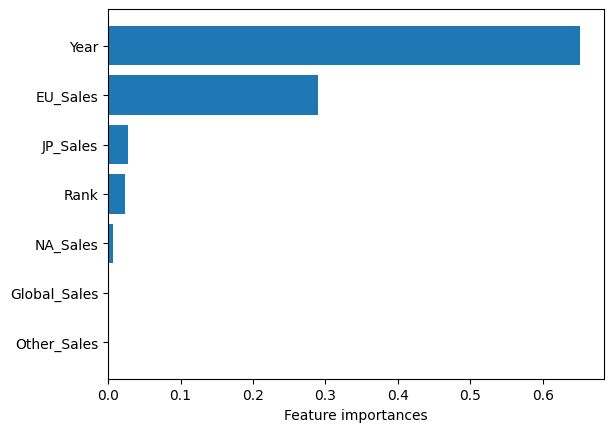

In [2]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


report = classification_report(y_val, best_tree.predict(x_val))
print(report)

accuracy = accuracy_score(y_val, best_tree.predict(x_val))
print(f'Accuracy: {accuracy}')

feature_importances = (best_tree.feature_importances_ /
                       sum(best_tree.feature_importances_))

results = pd.DataFrame({'Features': features,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True)

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Feature importances')
plt.show()

Как видно из строки `weighted avg` отчета о полученном решающем дереве, значения `precision` и `recall` очень близки, а также критерий `f1-score` достаточно высок, что говорит об однородности набора данных, на котором происходила тренировка классификатора и о достаточно высокой точности прогнозов полученного классификатора на всех подмножествах датасета. Полученное значение точности классификатора говорит о том, что в среднем полученное решающее дерево будет давать верные прогнозы в 87% случаев. Наиболее важными признаками при описании целевого признака `Platform` оказались `Year` и `EU_Sales`.

Также построим усеченное дерево решений.

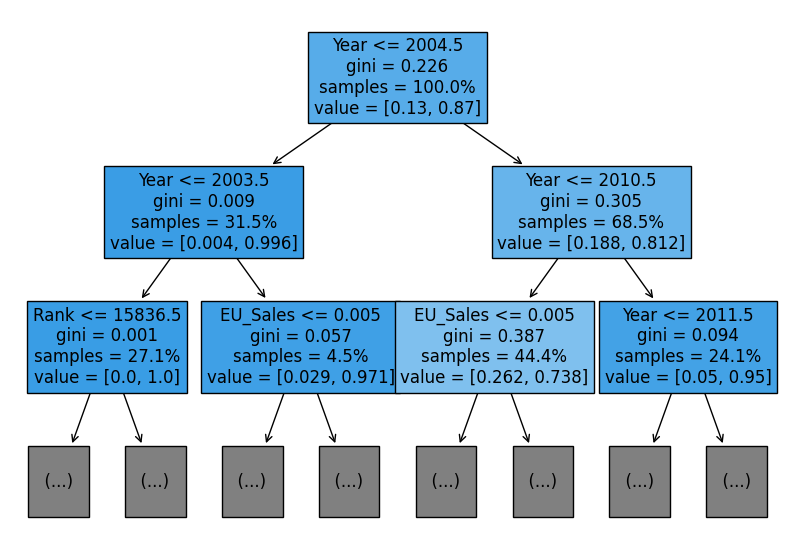

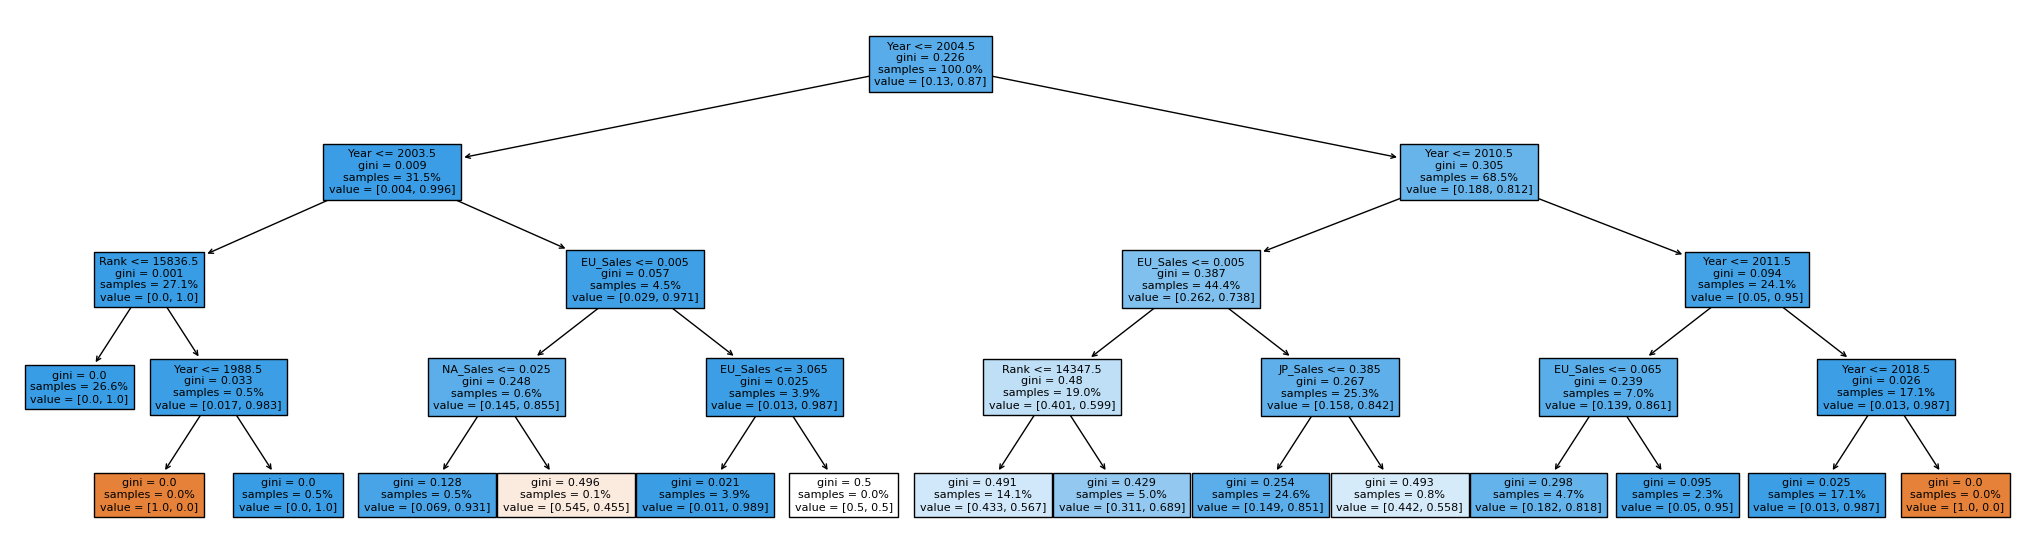

In [3]:
from sklearn import tree


fig = plt.figure(figsize=(10, 7))
tree.plot_tree(best_tree,
               feature_names=features,
               # impurity=False,
               proportion=True,
               max_depth=2,
               fontsize=12,
               filled=True
               )
plt.show()
fig = plt.figure(figsize=(26, 7))
tree.plot_tree(best_tree,
               feature_names=features,
               # impurity=False,
               proportion=True,
               fontsize=8,
               filled=True
               )
plt.show()

In [8]:
from sklearn.tree import export_text

tree_rules = export_text(best_tree, feature_names=list(x_tr.columns))
print(tree_rules)

|--- Year <= 2004.50
|   |--- Year <= 2003.50
|   |   |--- Rank <= 15836.50
|   |   |   |--- class: 1
|   |   |--- Rank >  15836.50
|   |   |   |--- Year <= 1988.50
|   |   |   |   |--- class: 0
|   |   |   |--- Year >  1988.50
|   |   |   |   |--- class: 1
|   |--- Year >  2003.50
|   |   |--- EU_Sales <= 0.00
|   |   |   |--- NA_Sales <= 0.02
|   |   |   |   |--- class: 1
|   |   |   |--- NA_Sales >  0.02
|   |   |   |   |--- class: 0
|   |   |--- EU_Sales >  0.00
|   |   |   |--- EU_Sales <= 3.06
|   |   |   |   |--- class: 1
|   |   |   |--- EU_Sales >  3.06
|   |   |   |   |--- class: 0
|--- Year >  2004.50
|   |--- Year <= 2010.50
|   |   |--- EU_Sales <= 0.00
|   |   |   |--- Rank <= 14347.50
|   |   |   |   |--- class: 1
|   |   |   |--- Rank >  14347.50
|   |   |   |   |--- class: 1
|   |   |--- EU_Sales >  0.00
|   |   |   |--- JP_Sales <= 0.38
|   |   |   |   |--- class: 1
|   |   |   |--- JP_Sales >  0.38
|   |   |   |   |--- class: 1
|   |--- Year >  2010.50
|   |   |--- Y

## 2.

Построим случайный лес на том же наборе данных.

In [29]:
from  sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=6679)
forest = forest.fit(x_tr, np.ravel(y_tr))

Аналогично пункту 1. задачи, выведем отчет по полученному классификатору на основе тестовой выборки при помощи команды `classification_report(...)` и оценим его точность при помощи функции `accuracy_score(...)`, а также получим значимость используемых признаков.

              precision    recall  f1-score   support

           0       0.46      0.33      0.39       545
           1       0.90      0.94      0.92      3528

    accuracy                           0.86      4073
   macro avg       0.68      0.64      0.65      4073
weighted avg       0.84      0.86      0.85      4073

Accuracy: 0.859317456420329


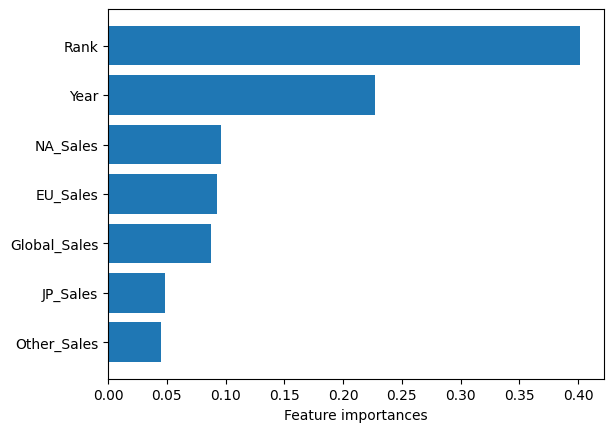

In [30]:
report = classification_report(y_val, forest.predict(x_val))
print(report)

accuracy = accuracy_score(y_val, forest.predict(x_val))
print(f'Accuracy: {accuracy}')

feature_importances = (forest.feature_importances_ /
                       sum(forest.feature_importances_))

results = pd.DataFrame({'Features': features,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True)

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Feature importances')
plt.show()

Точность полученного классификатора незначительно ниже точности прежде полученного решающего дерева, однако критерий `f1-score` повысился на 0.04, что свидетельствует о большей однородности выдаваемых регрессором прогнозов. Теперь наиболее значимыми признаками стали `Rank` и `Year`.

Переберем различные комбинации значений гиперпараметров при помощи `GridSearchCV` и оценим, насколько улучшился классификатор.

Итерация 1
n_estimators: 100
max_depth: 9
Итерация 2
max_depth: 9
              precision    recall  f1-score   support

           0       0.67      0.08      0.15       545
           1       0.88      0.99      0.93      3528

    accuracy                           0.87      4073
   macro avg       0.77      0.54      0.54      4073
weighted avg       0.85      0.87      0.83      4073

Accuracy: 0.8718389393567395


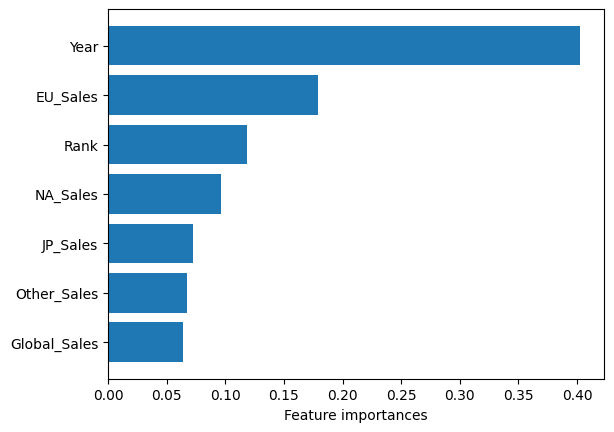

In [32]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': list(range(1, 10)),
    'criterion': ['gini']
}
tuned_forest = GridSearchCV(estimator=RandomForestClassifier(), 
                            param_grid=param_grid, cv=5, refit=True)
tuned_forest.fit(x_tr, np.ravel(y_tr))

print('Итерация 1')
 # n_estimators: значения варьируются от 50 до 400, выберем стандартные 100
print(f'n_estimators: {tuned_forest.best_estimator_.n_estimators}')
print(f'max_depth: {tuned_forest.best_estimator_.max_depth}') # max_depth: 9

# Теперь cдвинем диапазон max_depth

param_grid = {
    'n_estimators': [100],
    'max_depth': list(range(5, 15)),
    'criterion': ['gini']
}
tuned_forest = GridSearchCV(estimator=RandomForestClassifier(), 
                            param_grid=param_grid, cv=5, refit=True)
tuned_forest.fit(x_tr, np.ravel(y_tr))

print('Итерация 2')
print(f'max_depth: {tuned_forest.best_estimator_.max_depth}') # max_depth: 10

# Проанализируем полученный классификатор

report = classification_report(y_val,
                               tuned_forest.best_estimator_.predict(x_val))
print(report)

accuracy = accuracy_score(y_val, tuned_forest.best_estimator_.predict(x_val))
print(f'Accuracy: {accuracy}')

feature_importances = (tuned_forest.best_estimator_.feature_importances_ /
                       sum(tuned_forest.best_estimator_.feature_importances_))

results = pd.DataFrame({'Features': features,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True)

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Feature importances')
plt.show()

В сравнении с изначально построенным случайным лесом, мы выйграли 0.012 в точности предсказаний классификатора, но потеряли 0.02 в критерии `f1-score`, подобрав следующие гиперпараметры: `n_estimators` = 100, `max_depth` = 9. Можно заключить, что оптимизированный случайный лес несколько лучше построенного предсказывающего дерева и изначально построенного случайного леса. Наиболее значимыми признаками оказались `Year`, `EU_Sales` и `Rank`.